##**Predict the employee burn out rate**

Problem :

Problem Statement
World Mental Health Day is celebrated on October 10 each year. The objective of this day is to raise an awareness about mental health issues around the world and mobilise efforts in support of mental health. According to an anonymous survey, about 450 million people live with mental disorders that can be one of the primary causes of poor health and disability worldwide.


You are a Machine Learning engineer in a company. You are given a task to understand and observe the mental health of all the employees in your company. Therefore, you are required to predict the burn out rate of employees based on the provided features thus helping the company to take appropriate measures for their employees.

Data

train.csv (22750 x 9)

test.csv (12250 x 8)

sample_submission.csv (5 x 2)



# *Getting and Understanding Data* for Employee Burn Rate Prediction

Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Getting Data  (Import Data_Sets) Using Pandas Lib

In [9]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


##**Data Perprocessing**

Understanding Data for Employee Burn Rate Prediction

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15293 entries, 0 to 15292
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           15293 non-null  object 
 1   Date of Joining       15293 non-null  object 
 2   Gender                15292 non-null  object 
 3   Company Type          15292 non-null  object 
 4   WFH Setup Available   15292 non-null  object 
 5   Designation           15292 non-null  float64
 6   Resource Allocation   14338 non-null  float64
 7   Mental Fatigue Score  13838 non-null  float64
 8   Burn Rate             14541 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.1+ MB


In [4]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,15292.000000,14338.000000,13838.000000,14541.000000
mean,2.181206,4.483331,5.729152,0.452364
std,1.136400,2.047911,1.926293,0.198799
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.320000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [5]:
df.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
15288,fffe31003100300035003600,2008-08-18,Female,Service,No,3.0,5.0,7.4,NaN
15289,fffe38003000,2008-02-26,Male,Product,Yes,2.0,3.0,5.5,0.46
15290,fffe32003100300032003600,2008-09-04,Male,Service,No,2.0,5.0,6.1,0.51
15291,fffe32003200370031003300,2008-12-09,Male,Service,Yes,1.0,3.0,NaN,0.28
15292,fffe33003300330033003400,2008-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**Analysis of missing values (NaNs)**

check Missing Value and Dealing with missing values

In [10]:
df.isna().sum()c

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

Fill Missing Value using Medium Value

In [11]:
df=df.fillna(df.median())
print("Are there any value missing now? "+str(df.isna().any().any()))

Are there any value missing now? False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Exploratory Data Analysis using pairPlot

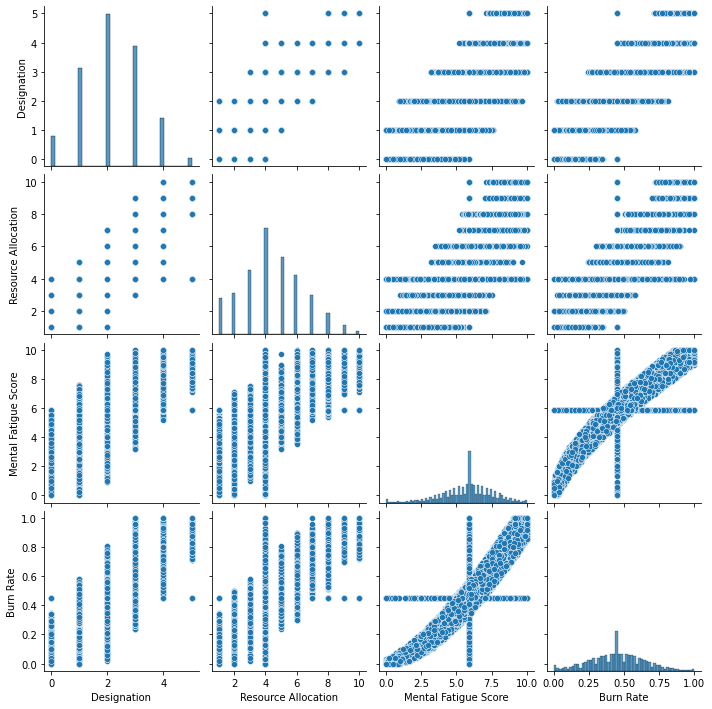

In [ ]:
import seaborn as sns
sns_Plot=sns.pairplot(df ,height=2.5)

 ##Exploration of Categorical Variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


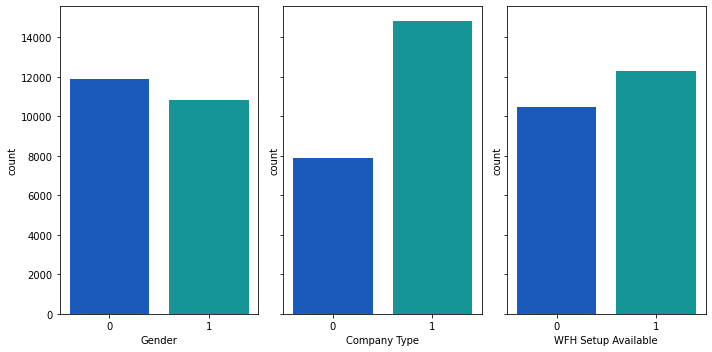

In [126]:
# Representing categorical data using Letter Value Boxplots
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(10,5))
sns.countplot(df["Gender"], palette="winter", ax=ax[0])
sns.countplot(df["Company Type"], palette="winter", ax=ax[1])
sns.countplot(df["WFH Setup Available"], palette="winter", ax=ax[2])
plt.tight_layout()
plt.show()

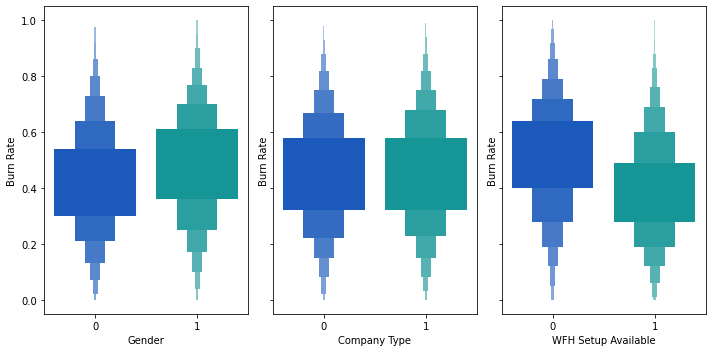

In [127]:
# Representing categorical data using Letter Value Boxplots
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(10,5))
sns.boxenplot(x="Gender", y="Burn Rate", data=df, palette="winter", linewidth=0.0, ax=ax[0])
sns.boxenplot(x="Company Type", y="Burn Rate", data=df, palette="winter", linewidth=0.0, ax=ax[1])
sns.boxenplot(x="WFH Setup Available", y="Burn Rate", data=df, palette="winter", linewidth=0.0, ax=ax[2])
plt.tight_layout()
plt.show()

##**Features Seleaction**

Seleact Required Features form data_Sets to build a model that can predict the prices of the different packages

Find Depandent and Indepandent variables using datasets,where x are independent values and y : dependent values

Count all features available in data sets

In [128]:
print("Numerical valued features counts:----------", end="\n\n")

print(df["Designation"].value_counts() , end="\n\n")

print(df["Resource Allocation"].value_counts(), end="\n\n")

print(df["Mental Fatigue Score"].value_counts(), end="\n\n")


Numerical valued features counts:----------

2.0    7588
3.0    5985
1.0    4881
4.0    2391
0.0    1507
5.0     398
Name: Designation, dtype: int64

4.0     5274
5.0     3861
3.0     3192
6.0     2943
2.0     2075
7.0     1965
1.0     1791
8.0     1044
9.0      446
10.0     159
Name: Resource Allocation, dtype: int64

5.9    2575
6.0     470
5.8     464
6.1     457
6.3     454
       ... 
0.5      24
0.2      23
0.4      19
0.1      17
0.3      13
Name: Mental Fatigue Score, Length: 101, dtype: int64



Feature Engineering  (Why do we need feature extraction?
Image result for feature extraction in machine learning
Why Feature Extraction is Useful? The technique of extracting the features is useful when you have a large data set and need to reduce the number of resources without losing any important or relevant information. Feature extraction helps to reduce the amount of redundant data from the data set.)

 Categorize features

In [12]:
def categorize_designation(data):
    if data["Designation"] <= 1.0:
        return 0
    if data["Designation"] > 1.0 and data["Designation"] <= 2.0:
        return 1
    if data["Designation"] > 2.0 and data["Designation"] <= 5.0:
        return 2
    return -1


def categorize_resource(data):
    if data["Resource Allocation"] <= 3.0:
        return 0
    if data["Resource Allocation"] > 3.0 and data["Resource Allocation"] <= 5.0:
        return 1
    if data["Resource Allocation"] > 5.0 and data["Resource Allocation"] <= 10.0:
        return 2
    return -1
    

def categorize_Mental_Fatigue(data):
    if data["Mental Fatigue Score"] <= 4.0:
        return 0
    if data["Mental Fatigue Score"] > 4.0 and data["Mental Fatigue Score"] <= 5.0:
        return 1
    if data["Mental Fatigue Score"] > 5.0 and data["Mental Fatigue Score"] <= 6.0:
        return 2
    if data["Mental Fatigue Score"] > 6.0 and data["Mental Fatigue Score"] <= 7.0:
        return 3
    if data["Mental Fatigue Score"] > 7.0:
        return 4
    return -1



df["categorize_designation"] = df.apply(categorize_designation, axis=1)
df["categorize_resource"] = df.apply(categorize_resource, axis=1)
df["categorize_Mental_Fatigue"] = df.apply(categorize_Mental_Fatigue, axis=1)

df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,categorize_designation,categorize_resource,categorize_Mental_Fatigue
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,1,0,0
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,0,0,1
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,4.0,5.8,0.49,1,1,2
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,0,0,0
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,2,2,3


In [10]:
print("Cetegorized valued features values:----------", end="\n\n")

print(df["categorize_designation"].value_counts(), end="\n\n")
print(df["categorize_resource"].value_counts(), end="\n\n")
print(df["categorize_Mental_Fatigue"].value_counts(), end="\n\n")

Cetegorized valued features values:----------

2    5884
1    5119
0    4290
Name: categorize_designation, dtype: int64

1    6141
0    4732
2    4420
Name: categorize_resource, dtype: int64

2    4296
4    3525
3    2838
0    2514
1    2120
Name: categorize_Mental_Fatigue, dtype: int64



Date of Joining (Calculate Days Using joining date)

In [13]:
# Get Current date using Pandas to_datetime()

current_date=pd.to_datetime("today")
print(current_date)

2022-02-16 08:50:13.414632


In [14]:
# Get Joining Date for Employees Data sets
#df=pd.read_csv('Emp_DataSets.csv')
df['Date of Joining']=pd.to_datetime(df['Date of Joining'])


Count No Of days using Current date and Joinng date

In [15]:
def create_days_count(data):
    return (current_date - data["Date of Joining"])

df["days_count"] = df.apply(create_days_count, axis=1)
df["days_count"] = df["days_count"].dt.days

df.head()


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,categorize_designation,categorize_resource,categorize_Mental_Fatigue,days_count
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,1,0,0,4887
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,0,0,1,4826
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,4.0,5.8,0.49,1,1,2,5091
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,0,0,0,4853
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,2,2,3,4955


Encoding Features

 As we can see in the above output,the sum column contains categorical variables which are not suitable to apply directly for fitting in model.So we need to encode this variable.

Encoode Dummy variables (LabelEncoding Using Dummy Variable Trap)


In [16]:
print(df["Gender"].value_counts(), end="\n\n")
print(df["Company Type"].value_counts(), end="\n\n")
print(df["WFH Setup Available"].value_counts(), end="\n\n")

Female    11908
Male      10842
Name: Gender, dtype: int64

Service    14833
Product     7917
Name: Company Type, dtype: int64

Yes    12290
No     10460
Name: WFH Setup Available, dtype: int64



In [17]:
from sklearn.preprocessing import LabelEncoder
labelecoder=LabelEncoder()

df['Gender']=labelecoder.fit_transform(df['Gender'])

df['Company Type']=labelecoder.fit_transform(df['Company Type'])

df['WFH Setup Available']=labelecoder.fit_transform(df['WFH Setup Available'])

df.head()


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,categorize_designation,categorize_resource,categorize_Mental_Fatigue,days_count
0,fffe32003000360033003200,2008-09-30,0,1,0,2.0,3.0,3.8,0.16,1,0,0,4887
1,fffe3700360033003500,2008-11-30,1,1,1,1.0,2.0,5.0,0.36,0,0,1,4826
2,fffe31003300320037003900,2008-03-10,0,0,1,2.0,4.0,5.8,0.49,1,1,2,5091
3,fffe32003400380032003900,2008-11-03,1,1,1,1.0,1.0,2.6,0.20,0,0,0,4853
4,fffe31003900340031003600,2008-07-24,0,1,0,3.0,7.0,6.9,0.52,2,2,3,4955


#Removing useless columns for data sets

In [18]:
df.drop(['Date of Joining', "Employee ID"], axis=1, inplace=True)

In [19]:
df.corr()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,categorize_designation,categorize_resource,categorize_Mental_Fatigue,days_count
Gender,1.000000,-0.009789,-0.073296,0.113295,0.138321,0.138519,0.150973,0.106738,0.138708,0.146964,0.000093
Company Type,-0.009789,1.000000,0.005725,0.006095,0.006263,0.002347,0.004194,0.001975,0.003419,0.003391,0.000237
WFH Setup Available,-0.073296,0.005725,1.000000,-0.229720,-0.275692,-0.263203,-0.298597,-0.218093,-0.278563,-0.279732,0.004144
Designation,0.113295,0.006095,-0.229720,1.000000,0.850656,0.656316,0.719283,0.929322,0.778668,0.624829,0.000930
Resource Allocation,0.138321,0.006263,-0.275692,0.850656,1.000000,0.737823,0.809938,0.787498,0.917622,0.708180,0.000612
Mental Fatigue Score,0.138519,0.002347,-0.263203,0.656316,0.737823,1.000000,0.877903,0.599045,0.672991,0.934367,-0.002255
Burn Rate,0.150973,0.004194,-0.298597,0.719283,0.809938,0.877903,1.000000,0.651262,0.739032,0.831712,0.001328
categorize_designation,0.106738,0.001975,-0.218093,0.929322,0.787498,0.599045,0.651262,1.000000,0.779657,0.589246,-0.000262
categorize_resource,0.138708,0.003419,-0.278563,0.778668,0.917622,0.672991,0.739032,0.779657,1.000000,0.677412,-0.004180
categorize_Mental_Fatigue,0.146964,0.003391,-0.279732,0.624829,0.708180,0.934367,0.831712,0.589246,0.677412,1.000000,-0.005484


##Drow HeatMap Using Correlation of DataSets

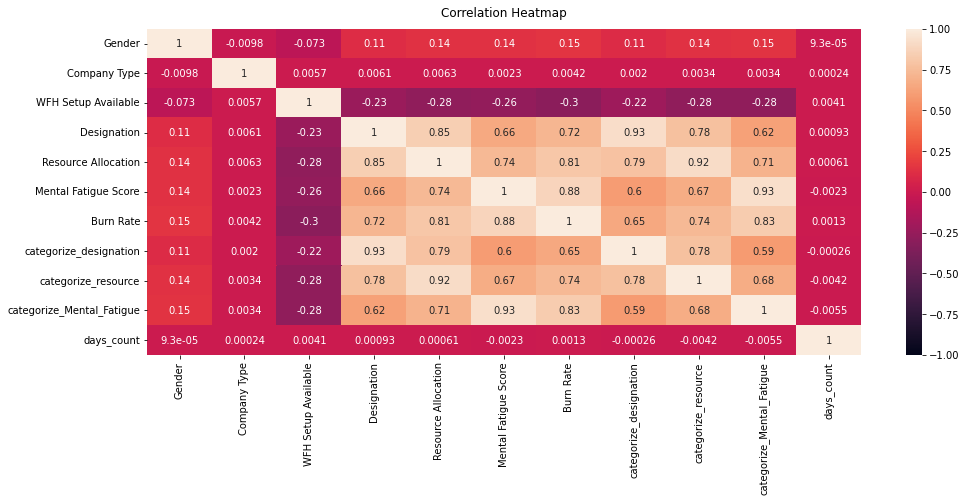

In [20]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig("correlation_heatmap.png")

##Import Test DataSets Using Pandas And Pre-Process Datasets

In [83]:
Test_DF=pd.read_csv("test.csv")
Test_DF.head()

,Employee_ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,10-12-2008,Female,Service,No,2,5,7.7
1,fffe31003300310037003800,14-08-2008,Female,Product,Yes,1,2,5.2
2,fffe33003400380035003900,13-11-2008,Male,Product,Yes,1,3,5.9
3,fffe3100370039003200,07-02-2008,Female,Service,No,3,6,4.6
4,fffe32003600390036003700,17-07-2008,Female,Product,No,2,5,6.4


Check Missing value or check null value in datasets

In [84]:
Test_DF.isna().sum()

Employee_ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

Feature Engineering (Why do we need feature extraction? Image result for feature extraction in machine learning Why Feature Extraction is Useful? The technique of extracting the features is useful when you have a large data set and need to reduce the number of resources without losing any important or relevant information. Feature extraction helps to reduce the amount of redundant data from the data set.)

##Categorize features For Test DataSets

In [85]:
def categorize_designation(data):
    if data["Designation"] <= 1.0:
        return 0
    if data["Designation"] > 1.0 and data["Designation"] <= 2.0:
        return 1
    if data["Designation"] > 2.0 and data["Designation"] <= 5.0:
        return 2
    return -1


def categorize_resource(data):
    if data["Resource Allocation"] <= 3.0:
        return 0
    if data["Resource Allocation"] > 3.0 and data["Resource Allocation"] <= 5.0:
        return 1
    if data["Resource Allocation"] > 5.0 and data["Resource Allocation"] <= 10.0:
        return 2
    return -1
    

def categorize_Mental_Fatigue(data):
    if data["Mental Fatigue Score"] <= 4.0:
        return 0
    if data["Mental Fatigue Score"] > 4.0 and data["Mental Fatigue Score"] <= 5.0:
        return 1
    if data["Mental Fatigue Score"] > 5.0 and data["Mental Fatigue Score"] <= 6.0:
        return 2
    if data["Mental Fatigue Score"] > 6.0 and data["Mental Fatigue Score"] <= 7.0:
        return 3
    if data["Mental Fatigue Score"] > 7.0:
        return 4
    return -1



Test_DF["categorize_designation"] = Test_DF.apply(categorize_designation, axis=1)
Test_DF["categorize_resource"] = Test_DF.apply(categorize_resource, axis=1)
Test_DF["categorize_Mental_Fatigue"] = Test_DF.apply(categorize_Mental_Fatigue, axis=1)

Test_DF.head()

,Employee_ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,categorize_designation,categorize_resource,categorize_Mental_Fatigue
0,fffe31003300390039003000,10-12-2008,Female,Service,No,2,5,7.7,1,1,4
1,fffe31003300310037003800,14-08-2008,Female,Product,Yes,1,2,5.2,0,0,2
2,fffe33003400380035003900,13-11-2008,Male,Product,Yes,1,3,5.9,0,0,2
3,fffe3100370039003200,07-02-2008,Female,Service,No,3,6,4.6,2,2,1
4,fffe32003600390036003700,17-07-2008,Female,Product,No,2,5,6.4,1,1,3


Date of Joining (Calculate Days Using joining date)

In [86]:
# Get Current date using Pandas to_datetime()

current_date=pd.to_datetime("today")
print(current_date)

2022-02-16 09:29:44.726601


In [87]:
# Get Joining Date for Employees Data sets
#df=pd.read_csv('Emp_DataSets.csv')
Test_DF['Date of Joining']=pd.to_datetime(Test_DF['Date of Joining'])


Count No Of days using Current date and Joinng date

In [105]:
def create_days_count(data):
    return (current_date - data["Date of Joining"])

Test_DF["days_count"] = Test_DF.apply(create_days_count, axis=1)
Test_DF["days_count"] = Test_DF["days_count"].dt.days

Test_DF.head()


,Employee_ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,categorize_designation,categorize_resource,categorize_Mental_Fatigue,days_count
0,fffe31003300390039003000,2008-10-12,0,1,0,2,5,7.7,1,1,4,4875
1,fffe31003300310037003800,2008-08-14,0,0,1,1,2,5.2,0,0,2,4934
2,fffe33003400380035003900,2008-11-13,1,0,1,1,3,5.9,0,0,2,4843
3,fffe3100370039003200,2008-07-02,0,1,0,3,6,4.6,2,2,1,4977
4,fffe32003600390036003700,2008-07-17,0,0,0,2,5,6.4,1,1,3,4962


##Encoding Features Test DataSets Features

As we can see in the above output,the sum column contains categorical variables which are not suitable to apply directly for fitting in model.So we need to encode this variable.

Encoode Dummy variables (LabelEncoding Using Dummy Variable Trap)

In [106]:
from sklearn.preprocessing import LabelEncoder
labelecoder=LabelEncoder()

Test_DF['Gender']=labelecoder.fit_transform(Test_DF['Gender'])

Test_DF['Company Type']=labelecoder.fit_transform(Test_DF['Company Type'])

Test_DF['WFH Setup Available']=labelecoder.fit_transform(Test_DF['WFH Setup Available'])

Test_DF.head()

,Employee_ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,categorize_designation,categorize_resource,categorize_Mental_Fatigue,days_count
0,fffe31003300390039003000,2008-10-12,0,1,0,2,5,7.7,1,1,4,4875
1,fffe31003300310037003800,2008-08-14,0,0,1,1,2,5.2,0,0,2,4934
2,fffe33003400380035003900,2008-11-13,1,0,1,1,3,5.9,0,0,2,4843
3,fffe3100370039003200,2008-07-02,0,1,0,3,6,4.6,2,2,1,4977
4,fffe32003600390036003700,2008-07-17,0,0,0,2,5,6.4,1,1,3,4962


Removing useless columns for Test data sets

In [115]:
Test_DF.drop(['Date of Joining', "Employee_ID"], axis=1, inplace=True)

In [116]:
Test_DF.shape

(12250, 10)

##**Find Dependent And Independent Vraiables**

 Using multi linear regression as the values are continuous where x are independent values and y : dependent values

In [103]:
y=df['Burn Rate']
y.head()


0    0.16
1    0.36
2    0.49
3    0.20
4    0.52
Name: Burn Rate, dtype: float64

In [104]:
x=df.drop(['Burn Rate'],axis=1)
x.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,categorize_designation,categorize_resource,categorize_Mental_Fatigue,days_count
0,0,1,0,2.0,3.0,3.8,1,0,0,4887
1,1,1,1,1.0,2.0,5.0,0,0,1,4826
2,0,0,1,2.0,4.0,5.8,1,1,2,5091
3,1,1,1,1.0,1.0,2.6,0,0,0,4853
4,0,1,0,3.0,7.0,6.9,2,2,3,4955


In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y  ,test_size=0.25)

##***Machine Learning Models***

Model Training and Predicitons

##**Random Forest Regressor**

In [94]:
from sklearn.ensemble import RandomForestRegressor 
lr_model = RandomForestRegressor()
lr_model.fit(x_train, y_train)

train_pred_linear = lr_model.predict(x_train)
test_pred_linear = lr_model.predict(x_test)



##**XGB Regressor**

In [95]:
from xgboost import XGBRegressor
Model=XGBRegressor()
Model.fit(x_train,y_train)

Y_Pred=Model.predict(x_test)
Y_Pred

[09:30:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.20215386, 0.6124733 , 0.5963991 , ..., 0.28228235, 0.6552518 ,
       0.43841353], dtype=float32)

##**LGBM Regressor**

In [96]:
from lightgbm import LGBMRegressor
model_2=LGBMRegressor()
model_2.fit(x_train,y_train)

Y_Pred_LGBMR=model_2.predict(x_test)

##**Evaluation Criteria**


In [97]:
from sklearn.metrics import r2_score
acc_Y_Test=r2_score(y_test,Y_Pred_LGBMR)

acc_Y_Train=r2_score(y_train,train_pred_linear)
print(acc_Y_Test, acc_Y_Train)

0.8606507445586081 0.9765788195909315


The evaluation metric that is used for this problem is the r2_score. The formula is as follows:


#score=100∗r2_score(actual_values,predicted_values)

In [130]:
Score=100*acc_Y_Test

print("Score is : ",Score)

Score is :  86.06507445586081


##Finally Prediction using Test DataSets

In [117]:
from lightgbm import LGBMRegressor
model_2=LGBMRegressor()
model_2.fit(x_train,y_train)

Y_Prediction_LGBMR=model_2.predict(Test_DF)

In [64]:
Y_Prediction_LGBMR=pd.Series(Y_Prediction_LGBMR)
Y_Prediction_LGBMR

0        0.599175
1        0.353830
2        0.384808
3        0.384984
4        0.524247
           ...   
12245    0.418333
12246    0.395336
12247    0.837450
12248    0.579386
12249    0.137100
Length: 12250, dtype: float64

##Create csv file using Enployee Id and Burn rate form Test_DataSets

In [119]:
TestData=pd.read_csv("test.csv")
#TestData



In [123]:
CSV_file=pd.DataFrame(data={'Employee ID':TestData.Employee_ID, 'Burn Rate':Y_Prediction_LGBMR})
CSV_file

,Employee ID,Burn Rate
0,fffe31003300390039003000,0.593671
1,fffe31003300310037003800,0.354027
2,fffe33003400380035003900,0.401557
3,fffe3100370039003200,0.389958
4,fffe32003600390036003700,0.522969
...,...,...
12245,fffe3900310034003700,0.408215
12246,fffe32003600330034003000,0.397163
12247,fffe31003800340039003000,0.836663
12248,fffe32003600380031003800,0.573185


In [125]:
CSV_file.to_csv("Submission.csv")